## Credit Card Customers

We will predict whether a bank will stop using credit cards for its customers. A dashboard will be developed to run customer segmentation and model outputs in the model. Our data consists of 10000 observations. It is aimed to retain the customers of the bank with the analysis and results. 

# Libraries

We import all our libraries that we will use in our study.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from feature_engine.encoding import RareLabelEncoder
from feature_engine import transformation as vt
from feature_engine.encoding import OneHotEncoder
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from xgboost import XGBClassifier
import xgboost as xgb

In [2]:
data = pd.read_csv(r"C:\Users\taylan.polat\Desktop\unl\MEF_Final_Proje\MLProje\BankChurners.csv")

In [3]:
df = data.copy()

In [4]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998

Our dataset consists of 10127 observations and 23 features.

In [5]:
df.shape

(10127, 23)

In [6]:
pd.DataFrame(df["Income_Category"].value_counts())

Income_Category
Less than $40K             3561
$40K - $60K                1790
$80K - $120K               1535
$60K - $80K                1402
Unknown                    1112
$120K +                     727

We have observed that the distribution of existing customers constitutes 84 percent of the total customers.

In [7]:
colors = ["#FFCC99", "#3d59ab"] 
attrition_counts = df.Attrition_Flag.value_counts(sort=True)
labels = ["Existing Customer","Attrited Customer"]
values = attrition_counts.values

pie = go.Pie(labels=labels, values=values, marker=dict(colors=colors))
layout = go.Layout(title="Proportion of Attrition Customers")
fig = go.Figure(data=[pie], layout=layout)
py.iplot(fig)

Since the attributed customer distribution in the target variable is very low, we will proceed with imbalanced models.

There is no missing value in the dataset

In [8]:
missing_values=df.isnull().sum()
percent_missing = df.isnull().sum()/df.shape[0]*100

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing
}
frame=pd.DataFrame(value)
frame

missing_values   \
CLIENTNUM                                                         0   
Attrition_Flag                                                    0   
Customer_Age                                                      0   
Gender                                                            0   
Dependent_count                                                   0   
Education_Level                                                   0   
Marital_Status                                                    0   
Income_Category                                                   0   
Card_Category                                                     0   
Months_on_book                                                    0   
Total_Relationship_Count                                          0   
Months_Inactive_12_mon                                            0   
Contacts_Count_12_mon                                             0   
Credit_Limit                                                      0   
Total_Revolving_Bal                                               0   
Avg_Open_To_Buy                                                   0   
Total_Amt_Chng_Q4_Q1                                              0   
Total_Trans_Amt                                                   0   
Total_Trans_Ct                                                    0   
Total_Ct_Chng_Q4_Q1                                               0   
Avg_Utilization_Ratio                                             0   
Naive_Bayes_Classifier_Attrition_Flag_Card_Cate...                0   
Naive_Bayes_Classifier_Attrition_Flag_Card_Cate...                0   

                                                    percent_missing %  
CLIENTNUM                                                         0.0  
Attrition_Flag                                                    0.0  
Customer_Age                                                      0.0  
Gender                                                            0.0  
Dependent_count                                                   0.0  
Education_Level                                                   0.0  
Marital_Status                                                    0.0  
Income_Category                                                   0.0  
Card_Category                                                     0.0  
Months_on_book                                                    0.0  
Total_Relationship_Count                                          0.0  
Months_Inactive_12_mon                                            0.0  
Contacts_Count_12_mon                                             0.0  
Credit_Limit                                                      0.0  
Total_Revolving_Bal                                               0.0  
Avg_Open_To_Buy                                                   0.0  
Total_Amt_Chng_Q4_Q1                                              0.0  
Total_Trans_Amt                                                   0.0  
Total_Trans_Ct                                                    0.0  
Total_Ct_Chng_Q4_Q1                                               0.0  
Avg_Utilization_Ratio                                             0.0  
Naive_Bayes_Classifier_Attrition_Flag_Card_Cate...                0.0  
Naive_Bayes_Classifier_Attrition_Flag_Card_Cate...                0.0

In [9]:
cat_feats = [x for x in df.columns if df[x].dtype == "object" and x != "CLIENTNUM"]
num_feats = [x for x in df.columns if df[x].dtype != "object"]

In [10]:
cat_feats

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']

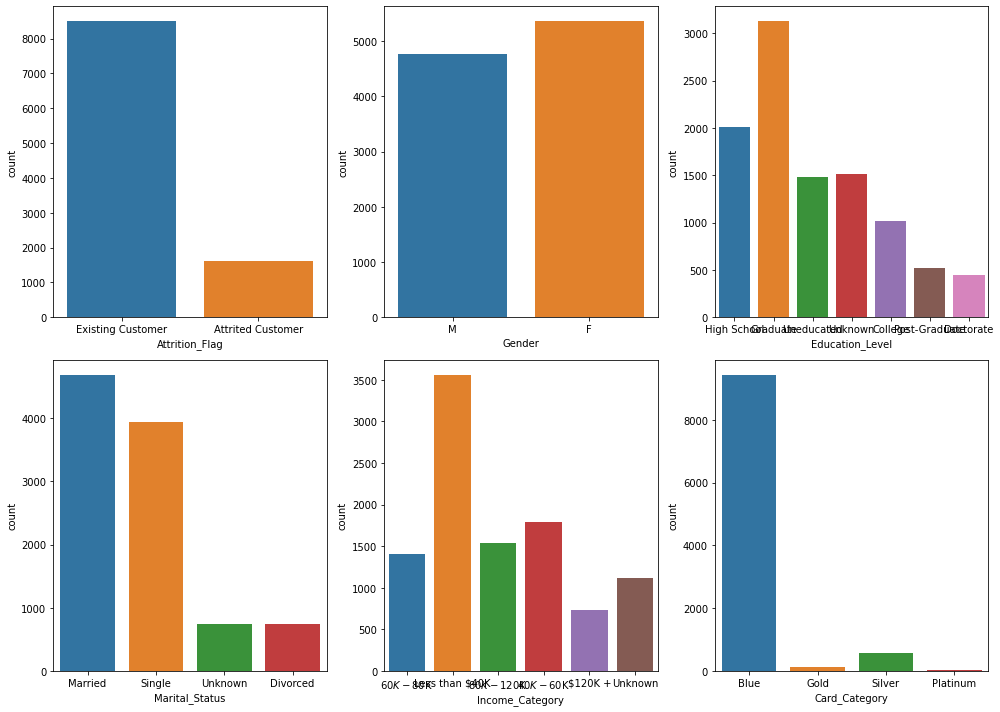

In [11]:
fig = plt.figure(figsize=(14, 10))

for i, col in enumerate(cat_feats):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=df[col])
    plt.tight_layout()
fig.show()

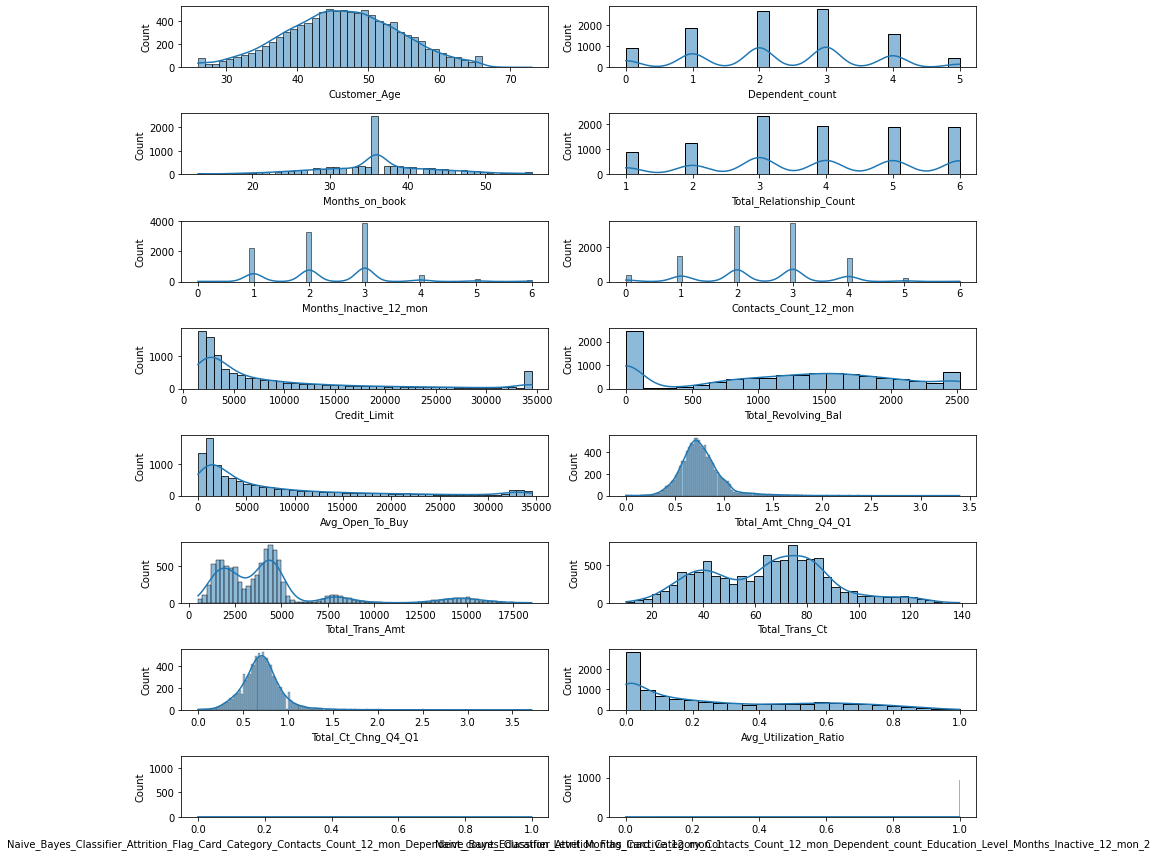

In [12]:
fig = plt.figure(figsize=(12, 12))

for i, col in enumerate(num_feats[1:]):
    plt.subplot(8, 2, i+1)
    sns.histplot(x=df[col], kde = True)
    plt.tight_layout()
fig.show()

Since the target variable will be predicted with tree-based models, outlier observation has not been eliminated.

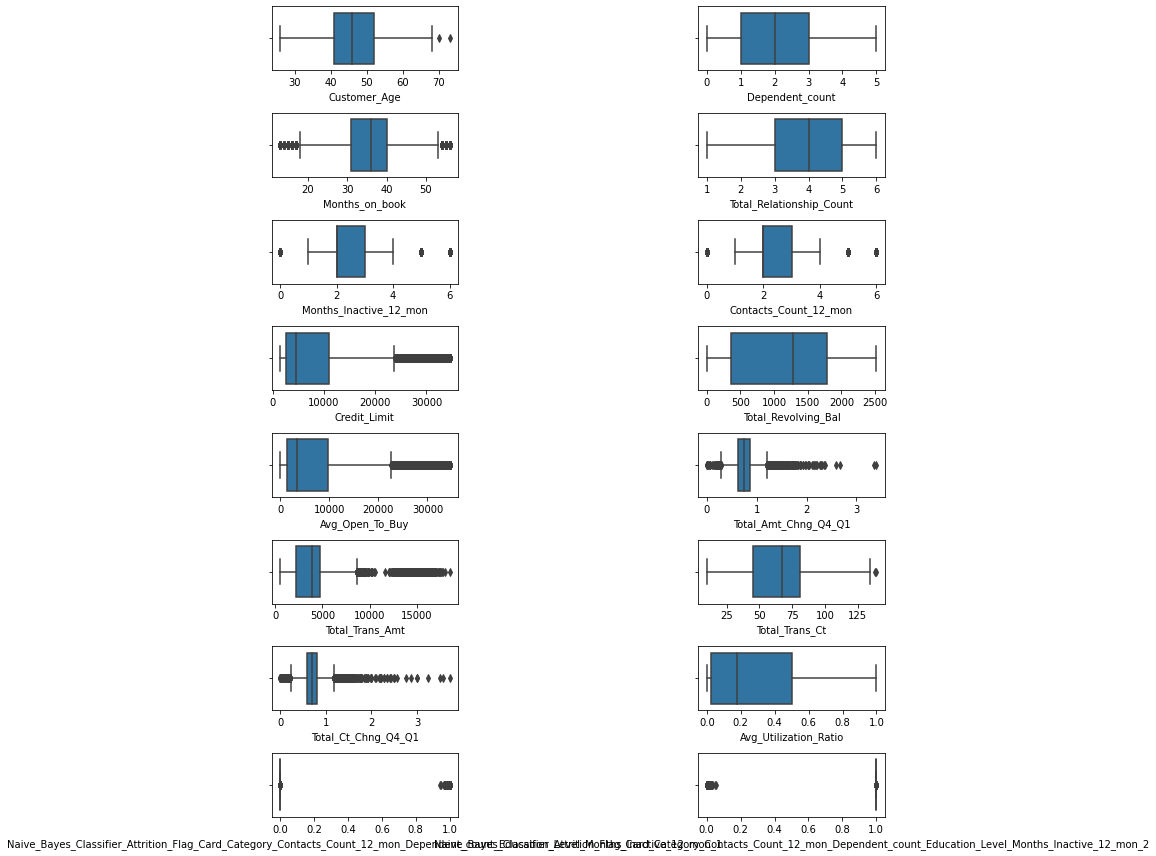

In [13]:
fig = plt.figure(figsize=(12, 12))

for i, col in enumerate(num_feats[1:]):
    plt.subplot(8, 2, i+1)
    sns.boxplot(x=df[col])
    plt.tight_layout()
fig.show()

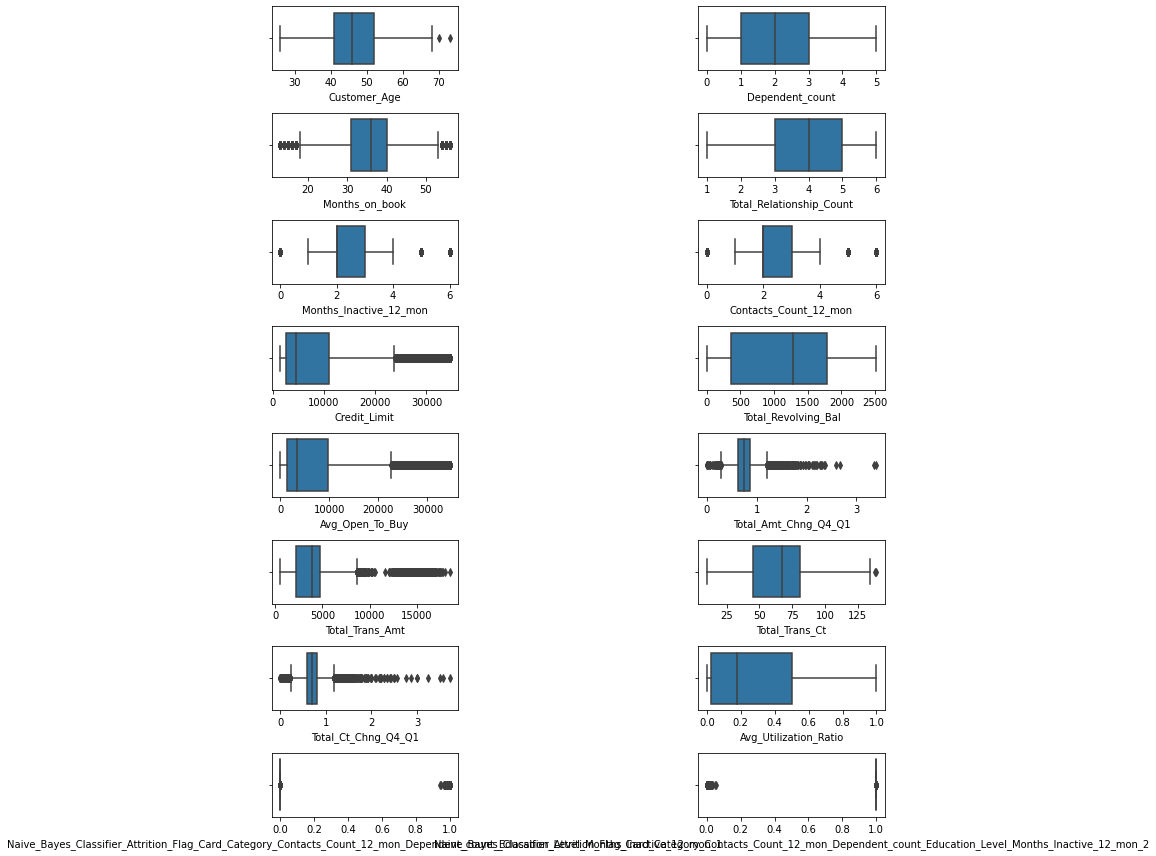

In [14]:
fig = plt.figure(figsize=(12, 12))

for i, col in enumerate(num_feats[1:]):
    plt.subplot(8, 2, i+1)
    sns.boxplot(x=df[col])
    plt.tight_layout()
fig.show()

For the labels included in the categorical variables, rare labels were examined. Labels with less than 0.05 are assigned the "Rare" label.

In [15]:
for col in df.columns:
    if df[col].dtypes == "O":
        if df[col].nunique() < 10:
            print(df.groupby(col)[col].count()/len(df))
            print()

Attrition_Flag
Attrited Customer    0.16066
Existing Customer    0.83934
Name: Attrition_Flag, dtype: float64

Gender
F    0.529081
M    0.470919
Name: Gender, dtype: float64

Education_Level
College          0.100030
Doctorate        0.044534
Graduate         0.308877
High School      0.198776
Post-Graduate    0.050953
Uneducated       0.146835
Unknown          0.149995
Name: Education_Level, dtype: float64

Marital_Status
Divorced    0.073862
Married     0.462822
Single      0.389355
Unknown     0.073961
Name: Marital_Status, dtype: float64

Income_Category
$120K +           0.071788
$40K - $60K       0.176755
$60K - $80K       0.138442
$80K - $120K      0.151575
Less than $40K    0.351634
Unknown           0.109805
Name: Income_Category, dtype: float64

Card_Category
Blue        0.931767
Gold        0.011455
Platinum    0.001975
Silver      0.054804
Name: Card_Category, dtype: float64



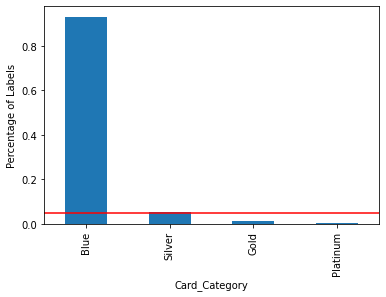

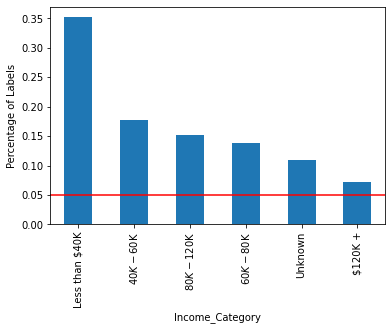

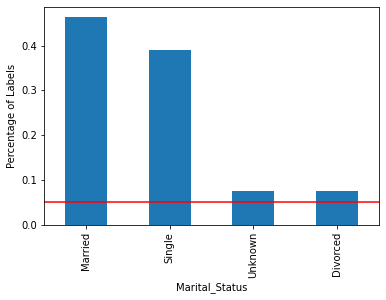

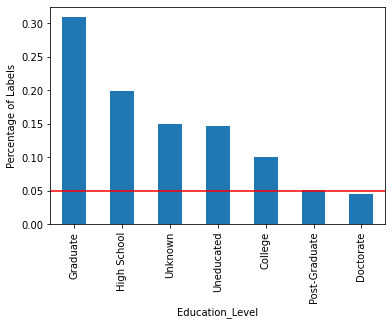

In [16]:
for col in ["Card_Category","Income_Category","Marital_Status","Education_Level"]:
    temp_df = pd.Series(df[col].value_counts()/len(df))
    fig = temp_df.sort_values(ascending = False).plot.bar()
    fig.set_xlabel(col)
    fig.axhline(y = 0.05,color = "red")
    fig.set_ylabel("Percentage of Labels")
    plt.show()

In [17]:
def find_non_rare_labels(df,variable,tolerance):
    temp = df.groupby([variable])[variable].count()/len(df)
    non_rare = [x for x in temp.loc[temp > tolerance].index.values]
    return non_rare

In [18]:
find_non_rare_labels(df,"Education_Level",0.05)

['College',
 'Graduate',
 'High School',
 'Post-Graduate',
 'Uneducated',
 'Unknown']

In [19]:
find_non_rare_labels(df,"Card_Category",0.05)

['Blue', 'Silver']

In [20]:
[x for x in df["Education_Level"].unique() if x not in find_non_rare_labels(df,"Education_Level",0.05)]

['Doctorate']

In [21]:
rare_encoder = RareLabelEncoder(tol=0.05, n_categories=3)
rare_encoder.fit_transform(df)['Card_Category'].value_counts()

Blue      9436
Silver     555
Rare       136
Name: Card_Category, dtype: int64

In [22]:
rare_encoder.fit_transform(df)['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Rare              451
Name: Education_Level, dtype: int64

In [23]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998

Log transform is applied for features that do not show normal distribution on numerical variables.

In [24]:
#Non-Normal Features

norm_list = ["Credit_Limit","Months_on_book","Avg_Open_To_Buy","Total_Trans_Amt"]

tf = vt.LogTransformer(variables = norm_list)

In [25]:
tf.fit(df)

LogTransformer(variables=['Credit_Limit', 'Months_on_book', 'Avg_Open_To_Buy',
                          'Total_Trans_Amt'])

In [26]:
df_second = tf.transform(df)

In [27]:
df_second["Income_Category"].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [28]:
encoder = OneHotEncoder( top_categories=1, variables=["Attrition_Flag", "Gender"], drop_last=False)

In [29]:
encoder.fit(df_second)

OneHotEncoder(top_categories=1, variables=['Attrition_Flag', 'Gender'])

In [30]:
df_final = encoder.transform(df_second)

In [31]:
encoder = OneHotEncoder( top_categories=3, variables=["Marital_Status", "Card_Category"], drop_last=False)

In [32]:
encoder.fit(df_final)

OneHotEncoder(top_categories=3, variables=['Marital_Status', 'Card_Category'])

In [33]:
df_final = encoder.transform(df_final)

In [34]:
dummies = pd.get_dummies(df_final[["Education_Level","Income_Category"]],drop_first = True)

In [35]:
df_final.drop(["Education_Level","Income_Category"],axis = 1, inplace = True)

In [36]:
df_final = pd.concat([df_final,dummies],axis = 1)

In [37]:
df_final.drop("CLIENTNUM",axis = 1,inplace = True)

In [38]:
df_final = df_final.rename(columns = {"Attrition_Flag_Existing Customer":"Target"})

In [39]:
df_final.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
       'Target', 'Gender_F', 'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Card_Category_Blue', 'Card_Category_Silver',
       'Card_Category_Gold', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown

In [40]:
df_final = df_final.rename(columns = {'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2':'Inactive_12_mon_2',
                                      'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1':'Inactive_12_mon_1'})

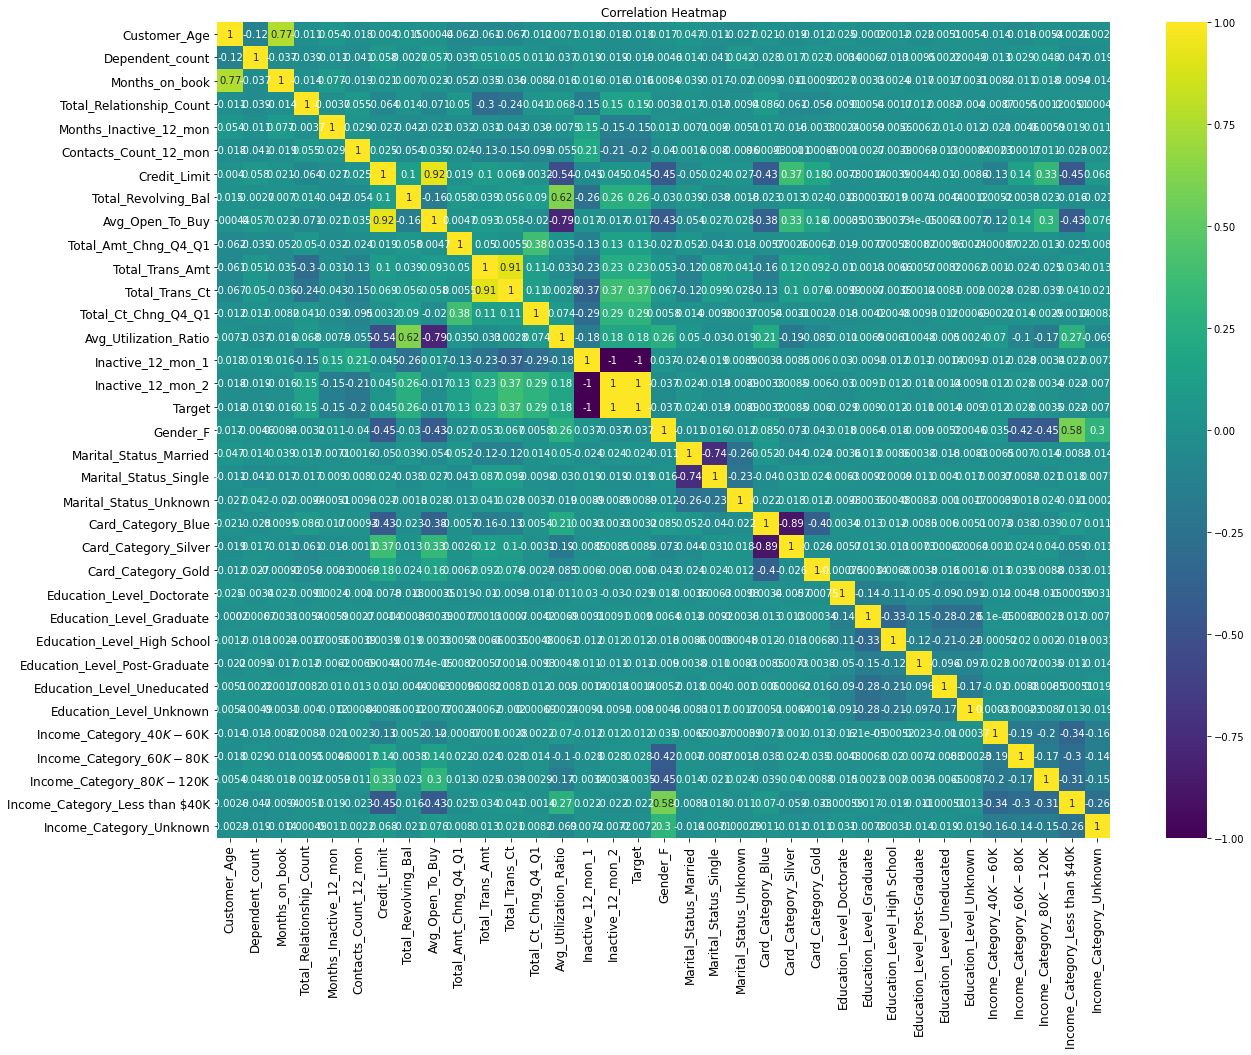

In [41]:
plt.figure(figsize = (20,15))
s = sns.heatmap(df_final.corr(),
                annot = True,
                cmap = "viridis",
                vmin = -1,
                vmax = 1)
s.set_yticklabels(s.get_yticklabels(),rotation = 0,fontsize = 12)
s.set_xticklabels(s.get_xticklabels(),rotation = 90,fontsize = 12)
plt.title("Correlation Heatmap")
plt.show()

In [42]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                    
    return col_corr

In [43]:
y = df_final["Target"]
X = df_final.drop("Target",axis = 1)

In [44]:
corrfeatures = correlation(X,0.8)

We exclude the variables with high correlation among themselves from the data so that there is no multicollinearity problem.

In [45]:
X.drop(corrfeatures,axis = 1,inplace = True)

We apply Smote function to our data before running the models because the data structure is imbalanced.

In [46]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_sm, y_sm = oversample.fit_resample(X, y)

In [47]:
oversample = SMOTE()

undersample = RandomUnderSampler()

steps = [('o', oversample), ('u', undersample)]
pipeline = Pipeline(steps=steps)

X, y = pipeline.fit_resample(X, y)

In [48]:
X.drop("Inactive_12_mon_1",axis = 1, inplace = True)

# Modeling

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [50]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((13600, 29), (3400, 29), (13600,), (3400,))

We train our dataset with Random Forest Classifier, Extra Tree Classifier, Adaboost Classifier and Gradient Boosting Classifier models for reaching optimal results

In [51]:
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':500,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 500,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

In [52]:
# Create 5 objects that represent our 4 models
rf = RandomForestClassifier(**rf_params)
et = ExtraTreesClassifier(**et_params)
ada = AdaBoostClassifier(**ada_params)
gb = GradientBoostingClassifier(**gb_params)

In [53]:
rf.fit(X_train,y_train)
et.fit(X_train,y_train)
ada.fit(X_train,y_train)
gb.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, min_samples_leaf=2, n_estimators=500)

In [54]:
model_names = ["RandomForestClassifier","ExtraTreesClassifier","AdaBoostClassifier",
               "GradientBoostingClassifier"]

model_types = [rf,et,ada,gb]

In [55]:
def plot_feature_importance(importance,names,model_type,modelname):
    print(f"{modelname}")
    y_pred=model_type.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(f"Roc_Score {modelname}",roc_auc_score(y_test,y_pred))
    plot_confusion_matrix(model_type,X_test,y_test)
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    plt.figure(figsize=(15,8))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.title('FEATURE IMPORTANCE')
    plt.xlabel(f'FEATURE IMPORTANCE of {modelname}')
    plt.ylabel(f'FEATURE NAMES of {modelname}')

RandomForestClassifier
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1687
           1       0.88      0.92      0.90      1713

    accuracy                           0.90      3400
   macro avg       0.90      0.89      0.89      3400
weighted avg       0.90      0.90      0.89      3400

Roc_Score RandomForestClassifier 0.8948161674506225
ExtraTreesClassifier
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1687
           1       0.89      0.90      0.89      1713

    accuracy                           0.89      3400
   macro avg       0.89      0.89      0.89      3400
weighted avg       0.89      0.89      0.89      3400

Roc_Score ExtraTreesClassifier 0.8923061590798907
AdaBoostClassifier
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1687
           1       0.93      0.95      0.94      1713

    accuracy     

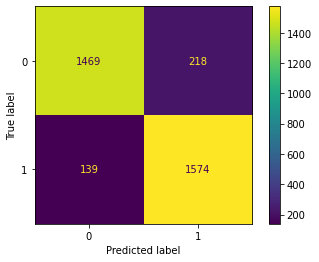

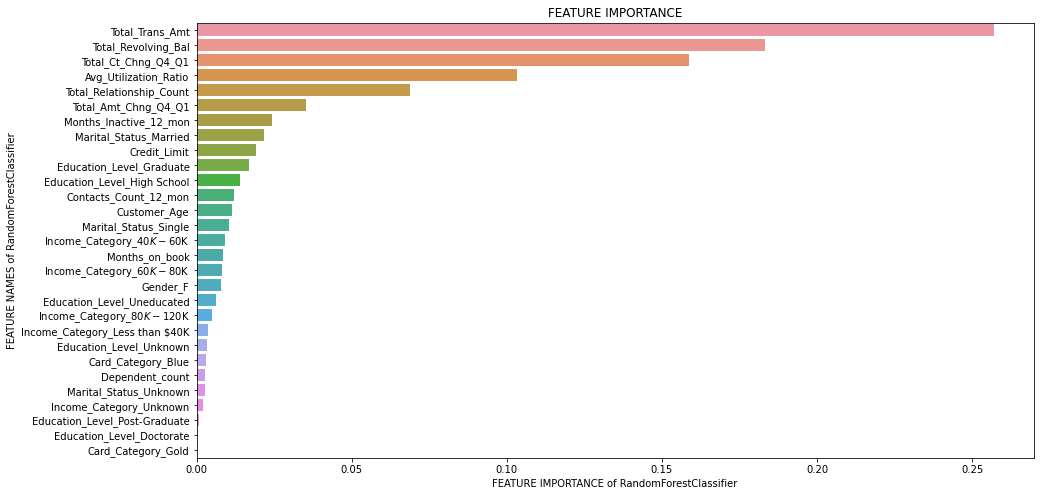

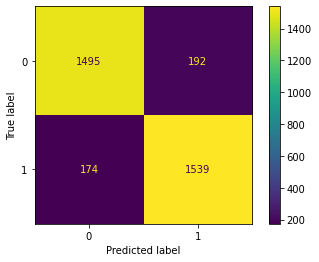

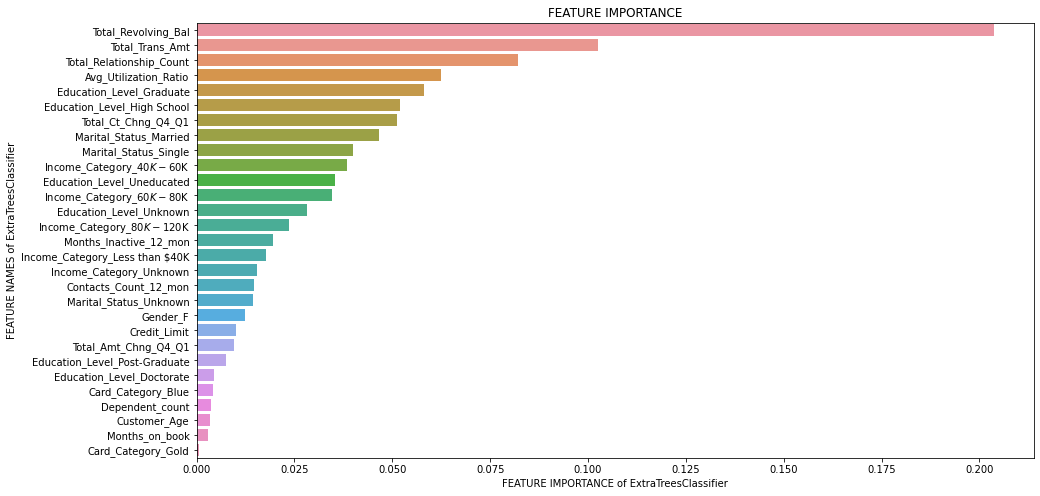

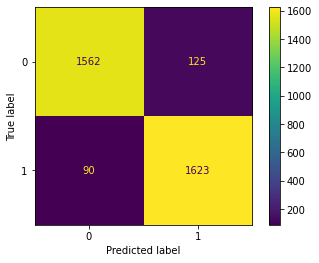

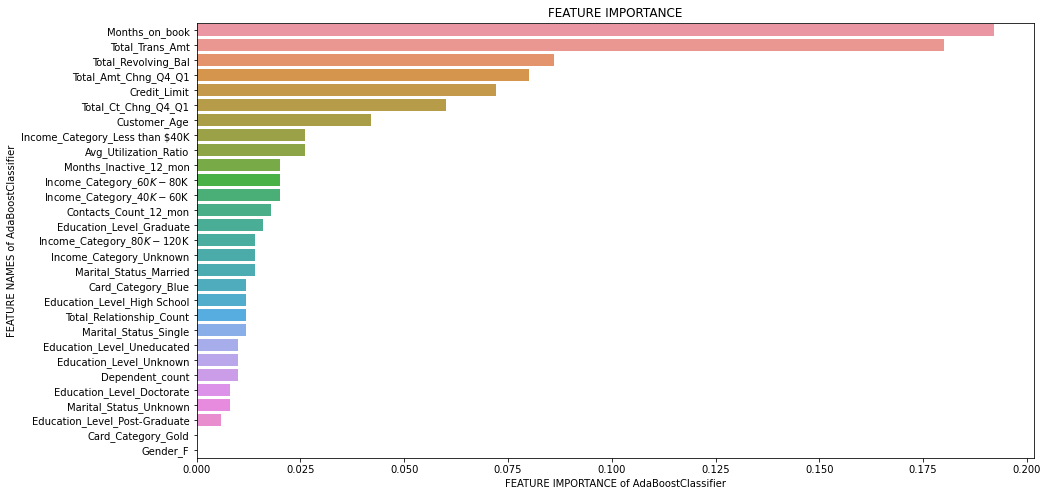

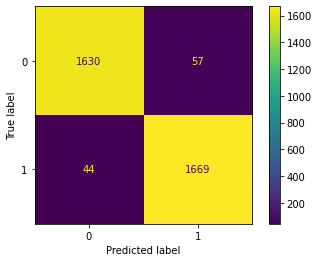

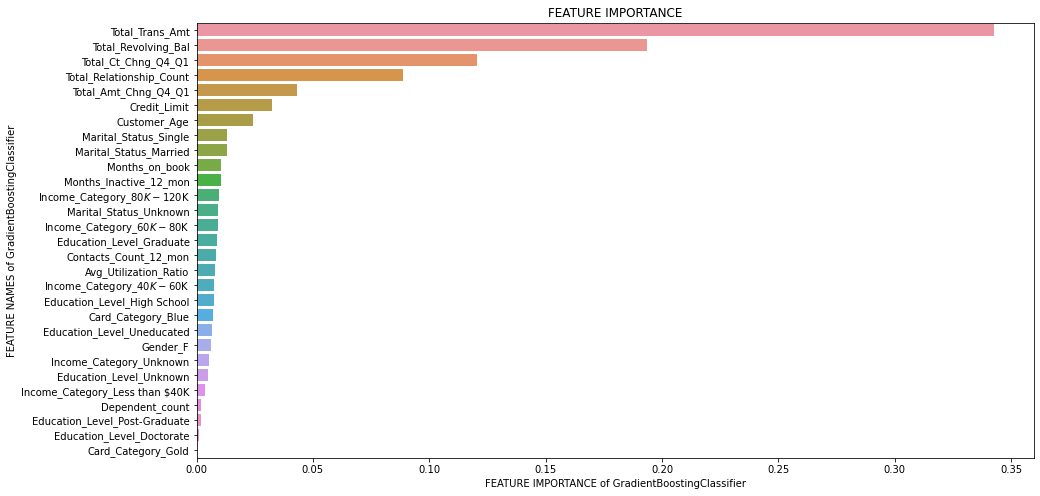

In [56]:
for model_type,modelname in zip(model_types,model_names):
    plot_feature_importance(model_type.feature_importances_,X_train.columns,model_type,modelname)

# Conclusion

Since the Gradient Boosting algorithm gives the highest Roc value in the models run, we create the final model by running it with less variables. With this final model we created, a Web Application has been prepared and the model results have reached the form to be updated by changing the parameter.

In [57]:
X_train = X_train[["Total_Trans_Amt","Total_Revolving_Bal","Total_Ct_Chng_Q4_Q1",
                  "Total_Relationship_Count","Total_Amt_Chng_Q4_Q1","Credit_Limit","Customer_Age"]]

In [58]:
X_test = X_test[["Total_Trans_Amt","Total_Revolving_Bal","Total_Ct_Chng_Q4_Q1",
                  "Total_Relationship_Count","Total_Amt_Chng_Q4_Q1","Credit_Limit","Customer_Age"]]

In [59]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, min_samples_leaf=2, n_estimators=500)

In [60]:
y_pred=model_type.predict(X_test)

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1687
           1       0.94      0.95      0.94      1713

    accuracy                           0.94      3400
   macro avg       0.94      0.94      0.94      3400
weighted avg       0.94      0.94      0.94      3400



In [62]:
print(f"Roc_Score {modelname}",roc_auc_score(y_test,y_pred))

Roc_Score GradientBoostingClassifier 0.9408271625572567
